# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [2]:
df = pd.read_csv('../data/North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011) (2).txt',delimiter='\t',skipfooter=14,engine='python')


In [3]:
df

,Notes,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,Texas,48.0,"Jan 01, 1979",1979/01/01,29.03
1,NaN,Texas,48.0,"Jan 02, 1979",1979/01/02,31.35
2,NaN,Texas,48.0,"Jan 03, 1979",1979/01/03,41.66
3,NaN,Texas,48.0,"Jan 04, 1979",1979/01/04,47.30
4,NaN,Texas,48.0,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...,...,...
12050,NaN,Texas,48.0,"Dec 29, 2011",2011/12/29,66.64
12051,NaN,Texas,48.0,"Dec 30, 2011",2011/12/30,68.61
12052,NaN,Texas,48.0,"Dec 31, 2011",2011/12/31,73.49
12053,Total,Texas,48.0,NaN,NaN,78.14


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [4]:
condition = df["Notes"] == "Total"
df.drop(df[condition].index) #applying mask then droping by the index of the condition 
df =df.drop("Notes", axis = 1) 

df

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,Texas,48.0,"Jan 01, 1979",1979/01/01,29.03
1,Texas,48.0,"Jan 02, 1979",1979/01/02,31.35
2,Texas,48.0,"Jan 03, 1979",1979/01/03,41.66
3,Texas,48.0,"Jan 04, 1979",1979/01/04,47.30
4,Texas,48.0,"Jan 05, 1979",1979/01/05,46.89
...,...,...,...,...,...
12050,Texas,48.0,"Dec 29, 2011",2011/12/29,66.64
12051,Texas,48.0,"Dec 30, 2011",2011/12/30,68.61
12052,Texas,48.0,"Dec 31, 2011",2011/12/31,73.49
12053,Texas,48.0,NaN,NaN,78.14


>3) Make a column called Date that is in the pandas datetime format

In [5]:

#Make a column called Date that is in the pandas datetime format


dates = df["Month Day, Year Code"]
df["Date"] = pd.to_datetime(dates)
mask = df["Date"].astype(str)




In [6]:
#df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [7]:
df[["Year", "Month", "Day"]] = mask.str.split('-', expand =True)
df

,State,State Code,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,Texas,48.0,"Jan 01, 1979",1979/01/01,29.03,1979-01-01,1979,01,01
1,Texas,48.0,"Jan 02, 1979",1979/01/02,31.35,1979-01-02,1979,01,02
2,Texas,48.0,"Jan 03, 1979",1979/01/03,41.66,1979-01-03,1979,01,03
3,Texas,48.0,"Jan 04, 1979",1979/01/04,47.30,1979-01-04,1979,01,04
4,Texas,48.0,"Jan 05, 1979",1979/01/05,46.89,1979-01-05,1979,01,05
...,...,...,...,...,...,...,...,...,...
12050,Texas,48.0,"Dec 29, 2011",2011/12/29,66.64,2011-12-29,2011,12,29
12051,Texas,48.0,"Dec 30, 2011",2011/12/30,68.61,2011-12-30,2011,12,30
12052,Texas,48.0,"Dec 31, 2011",2011/12/31,73.49,2011-12-31,2011,12,31
12053,Texas,48.0,NaN,NaN,78.14,NaT,NaT,None,None


> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

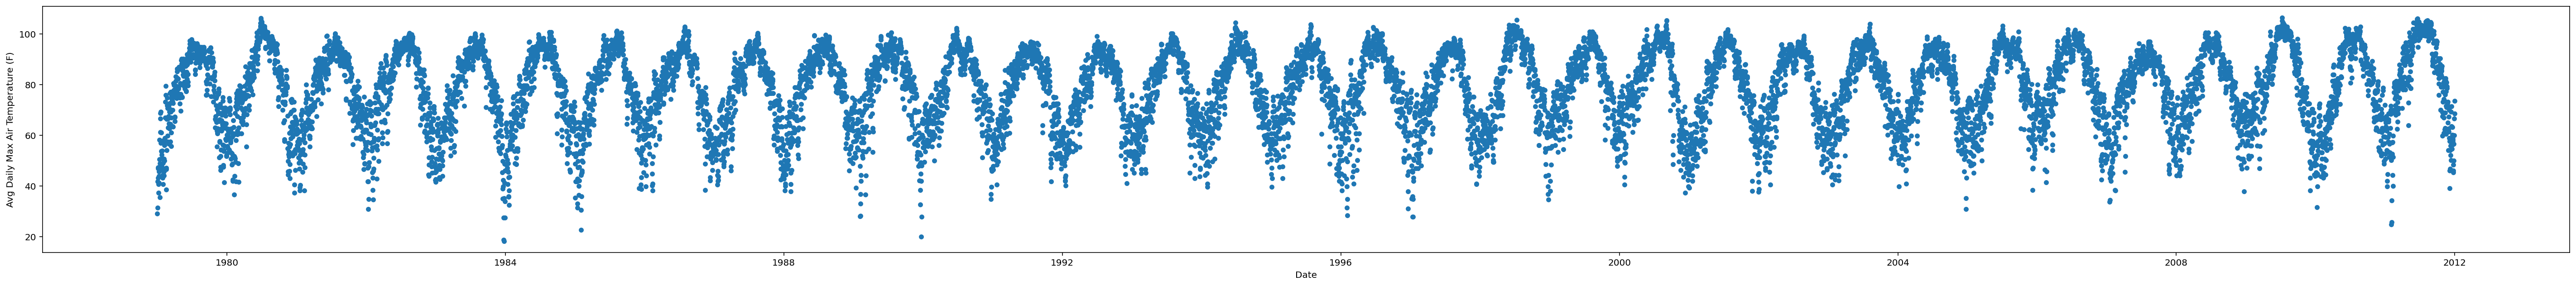

In [8]:
df.plot.scatter(x = "Date", y = "Avg Daily Max Air Temperature (F)" , figsize=(50,5))

>5) Describe your plot.

In [9]:
print("From the plot it is clear that the avg daily max air temperature will grow like a sinusoidal wave. In the begining of the year it starts colder thens get warmer cyclically, at a similar rate per year, once it reaches a max, it will begin to decrease.")

df = df.dropna()


From the plot it is clear that the avg daily max air temperature will grow like a sinusoidal wave. In the begining of the year it starts colder thens get warmer cyclically, at a similar rate per year, once it reaches a max, it will begin to decrease.


### Adding colors for our graph

In [10]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

/tmp/ipykernel_2187882/2382980842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row


>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

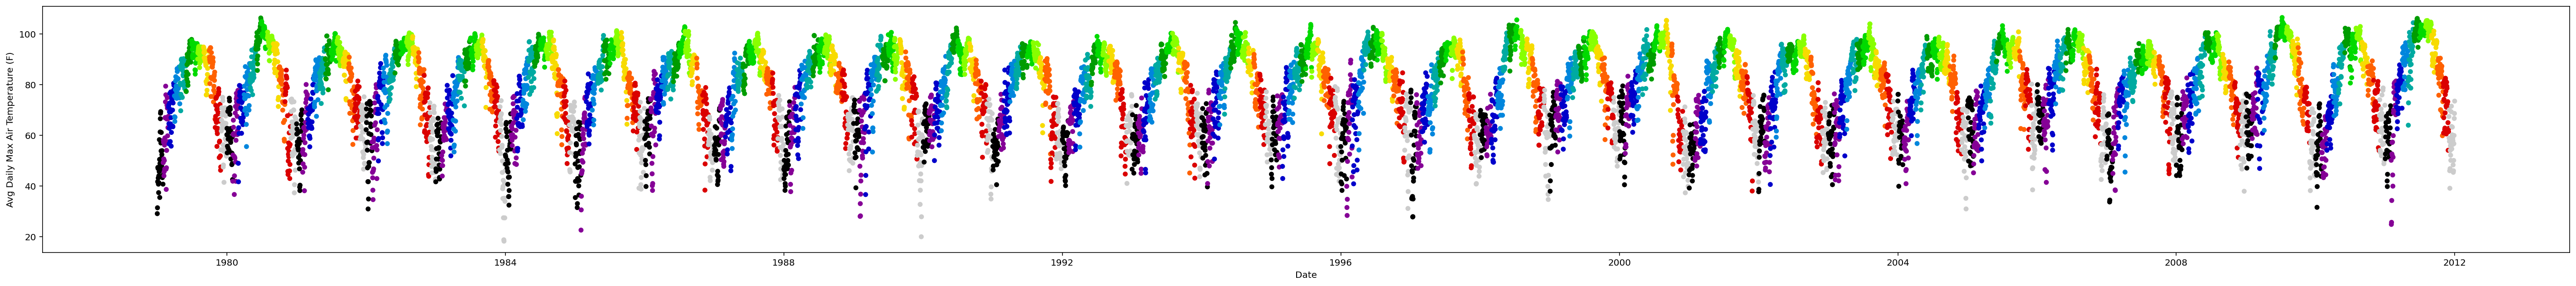

In [11]:
df.plot.scatter(x = "Date", y = "Avg Daily Max Air Temperature (F)", c=df["color"] , figsize=(50,5))


## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [12]:

import pandas as pd
import numpy as np

mask = (df["Date"] >= "1979-01-01") & (df["Date"] <"1979-07-01")
selectedDates = df["Date"][mask]

selectedTemp = df["Avg Daily Max Air Temperature (F)"][mask]

selectedColor = df["color"][mask]



subset = pd.DataFrame({"Date1":selectedDates, "AvgTemp" : selectedTemp, "color" : selectedColor})




>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date1', ylabel='AvgTemp'>

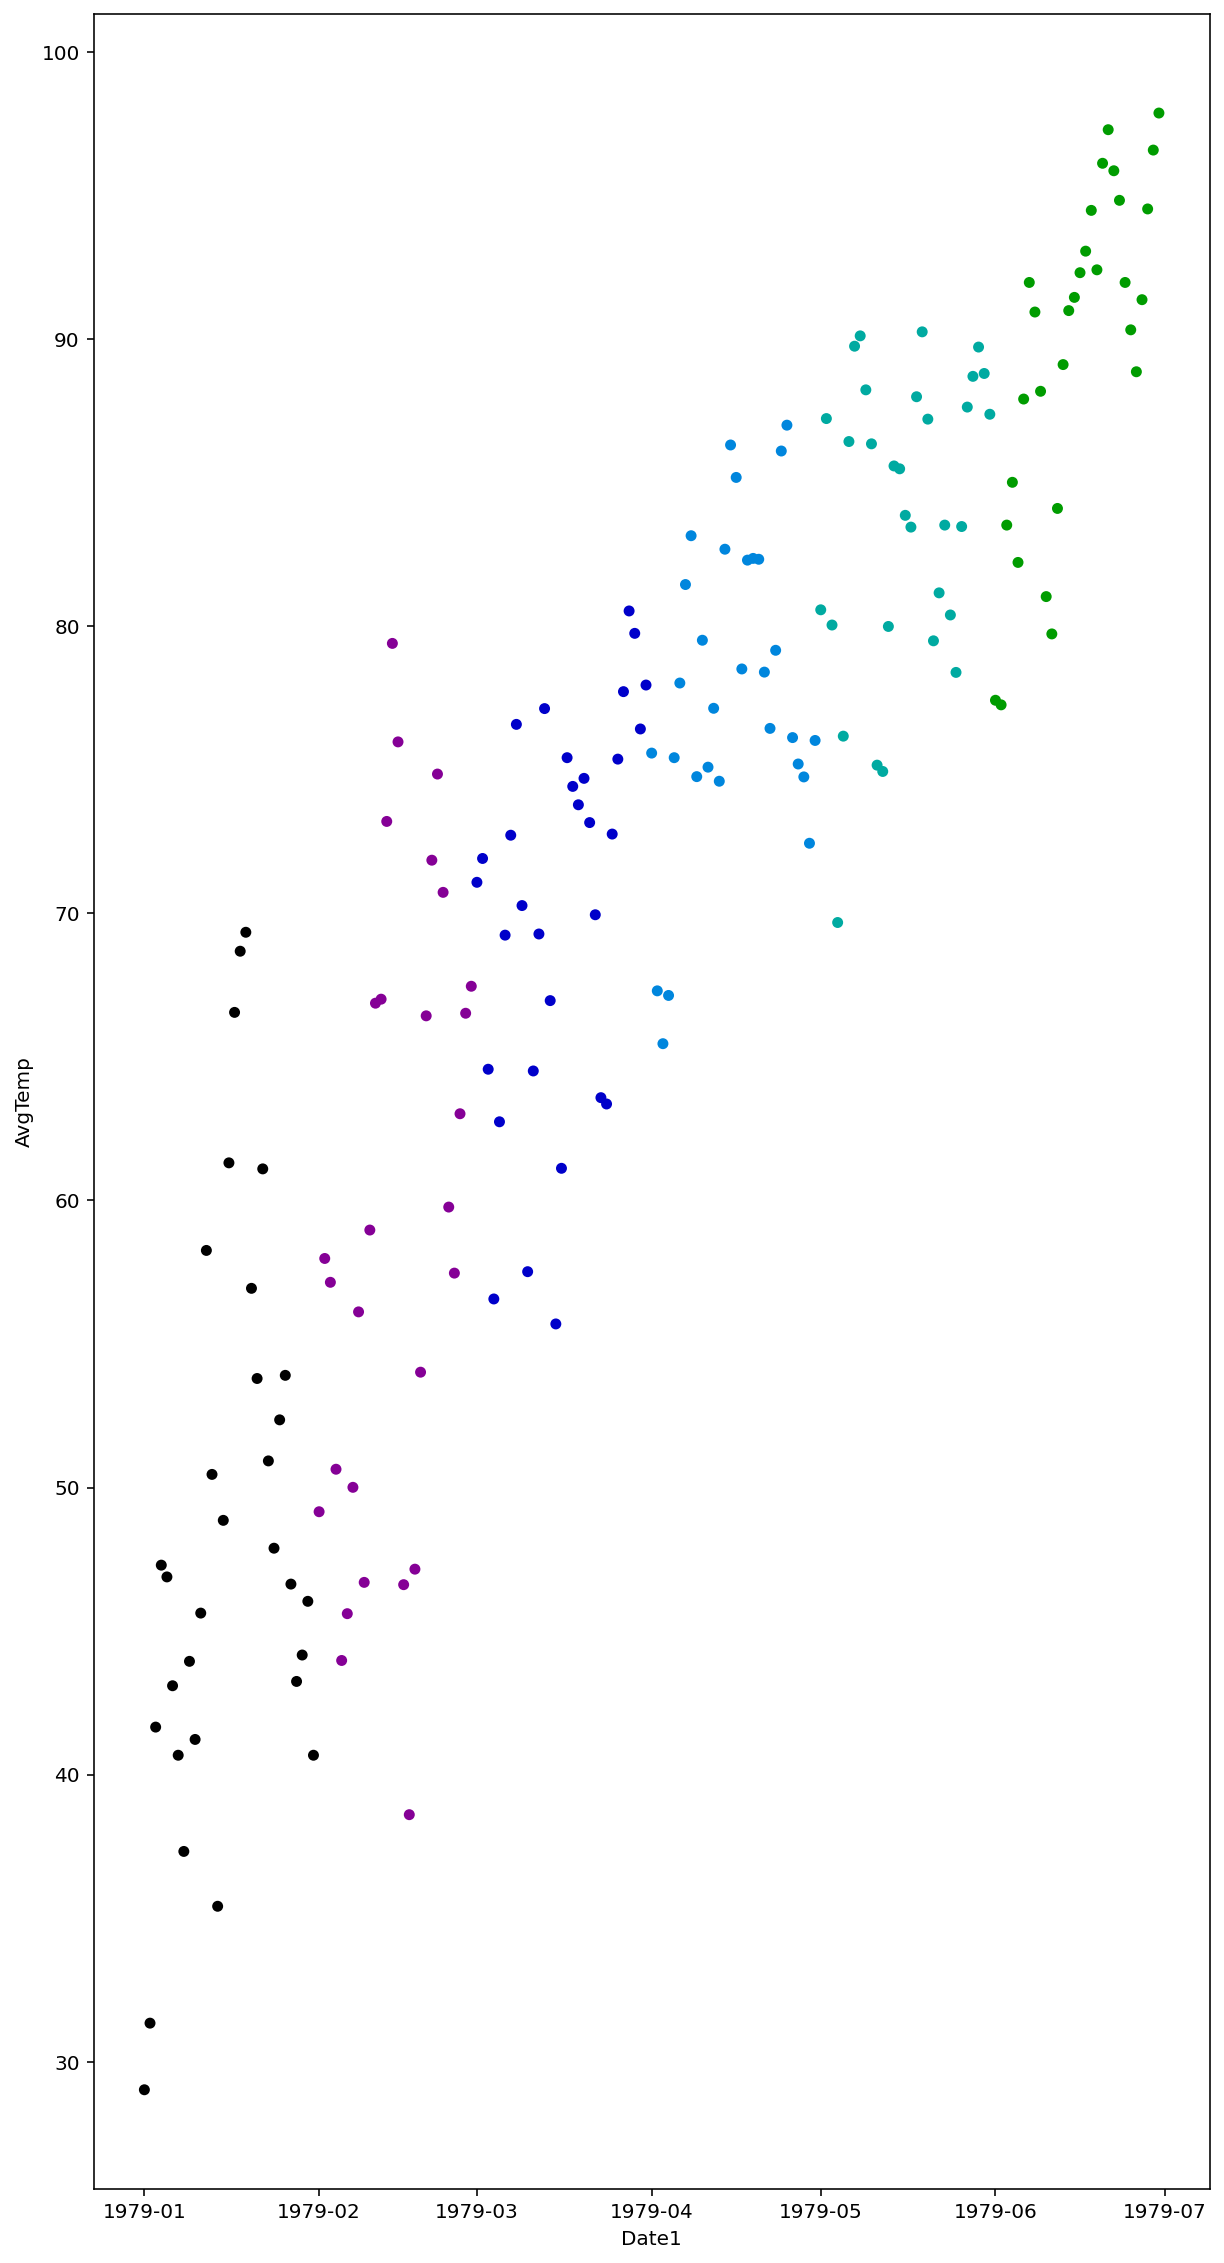

In [13]:
subset.plot.scatter(x="Date1", y="AvgTemp", figsize=(10, 20), c= "color" )

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [14]:
subset['DateInt'] = subset['Date1'].astype(int)/10e10 # This will be used later
X=subset['DateInt'].values
Y=subset['AvgTemp'].values

In [15]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [16]:
Y_pred = lin_reg(X,Y)

0.00031704743784624086 -853.4198994394189


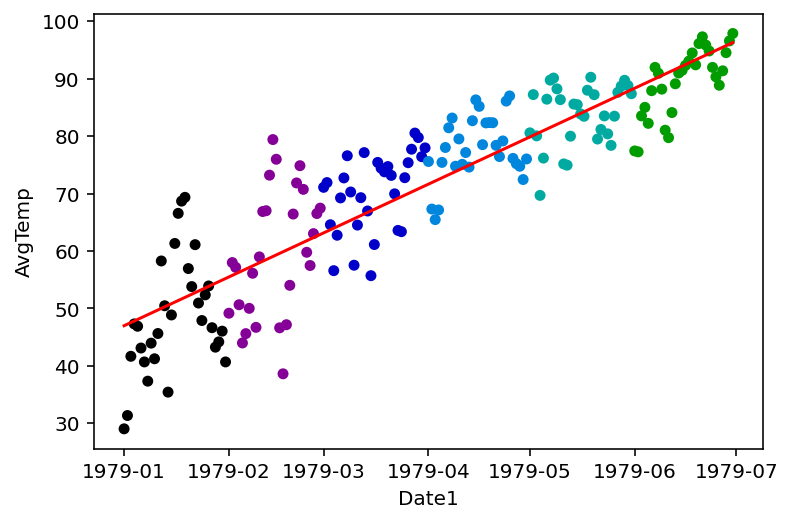

In [17]:
subset.plot.scatter(x='Date1', y='AvgTemp',c='color')
plt.plot([min(subset['Date1'].values), max(subset['Date1'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line? (Fix)

In [18]:
print("The slope is 0.00031704743784624086, and the intercept for the line is -853.4198994394189") 

The slope is 0.00031704743784624086, and the intercept for the line is -853.4198994394189


>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [19]:
maxY = Y_pred.max()
minY = Y_pred.min()

print("Max:" , maxY, "Min:", minY)

print("The slope is positive but very tiny: 0.00031704743784624086, in this sense it's taking a picture of the larger frame of data and it shows the degrees changing at that this subset")

Max: 96.29189605974136 Min: 46.98467852589397
The slope is positive but very tiny: 0.00031704743784624086, in this sense it's taking a picture of the larger frame of data and it shows the degrees changing at that this subset


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

3.072410840971274e-07 75.67019246681011


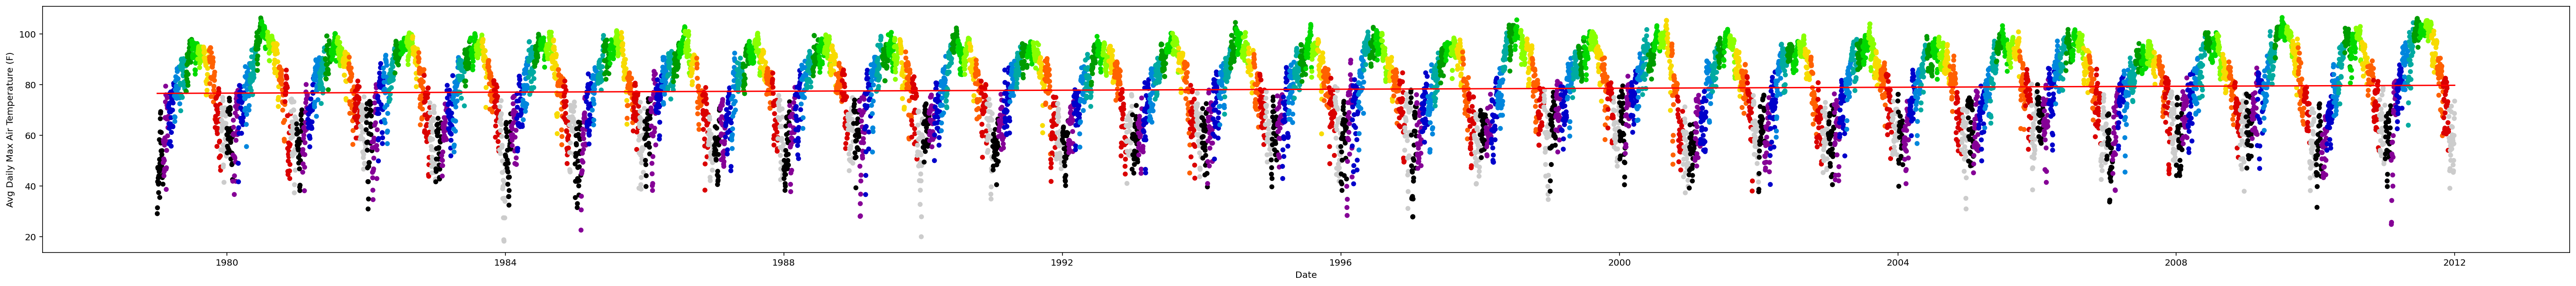

In [20]:

#Generate a best fit line for the full data set and plot the line over top of the data.
date_d = df['Date'].astype(int)/10e10 


X=date_d.values

Y=df['Avg Daily Max Air Temperature (F)'].values
Y_pred = lin_reg(X,Y)

df["Date"].values

df.plot.scatter(x="Date", y="Avg Daily Max Air Temperature (F)", figsize=(50, 5), c = df["color"])
# df.plot.line(x="Date", y=Y_pred, color='red')
plt.plot([min(df['Date']), max(df['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()


>12) Is the slope positive or negative? What do you think that means?

In [21]:
print("The slope would be: 3.072410840971274e-07, so it would be positive but it would be very tiny and it shows that the average temperature in degrees is changing very slowly over time. Another interpretation could be that the number is so small that you would need to compute the p-value in order to determine the significance. Thus, no linear relationship. ")

The slope would be: 3.072410840971274e-07, so it would be positive but it would be very tiny and it shows that the average temperature in degrees is changing very slowly over time. Another interpretation could be that the number is so small that you would need to compute the p-value in order to determine the significance. Thus, no linear relationship. 
